In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data = pd.read_csv('general_data.csv')
data.head()


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [49]:
data=data.drop(columns=['NumCompaniesWorked','TotalWorkingYears'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      4410 non-null   int64 
 1   Attrition                4410 non-null   object
 2   BusinessTravel           4410 non-null   object
 3   Department               4410 non-null   object
 4   DistanceFromHome         4410 non-null   int64 
 5   Education                4410 non-null   int64 
 6   EducationField           4410 non-null   object
 7   EmployeeCount            4410 non-null   int64 
 8   EmployeeID               4410 non-null   int64 
 9   Gender                   4410 non-null   int64 
 10  JobLevel                 4410 non-null   int64 
 11  JobRole                  4410 non-null   object
 12  MaritalStatus            4410 non-null   object
 13  MonthlyIncome            4410 non-null   int64 
 14  Over18                   4410 non-null  

In [50]:
enc = LabelEncoder()
#List of varibales that need to be endocded... EmployeeID,YearsAtCompany ,YearsSinceLastPromotion ,YearsWithCurrManager 
#doesnt need to be coded as the data is already unique
CatVarList = ['Attrition','BusinessTravel','Department','DistanceFromHome','EducationField','Gender',
             'EmployeeCount','JobRole','MaritalStatus','Over18']
             
for i in CatVarList:
    data[[i]] = enc.fit_transform(data[[i]])

# EmployeeId. is like id column So can be removed.
data.drop('EmployeeID', inplace=True, axis=1)
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      4410 non-null   int64
 1   Attrition                4410 non-null   int32
 2   BusinessTravel           4410 non-null   int32
 3   Department               4410 non-null   int32
 4   DistanceFromHome         4410 non-null   int64
 5   Education                4410 non-null   int64
 6   EducationField           4410 non-null   int32
 7   EmployeeCount            4410 non-null   int64
 8   Gender                   4410 non-null   int64
 9   JobLevel                 4410 non-null   int64
 10  JobRole                  4410 non-null   int32
 11  MaritalStatus            4410 non-null   int32
 12  MonthlyIncome            4410 non-null   int64
 13  Over18                   4410 non-null   int32
 14  PercentSalaryHike        4410 non-null   int64
 15  Stan

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


# Hypothesis 1

In [51]:
from scipy import stats
print(stats.skew(data.Age))
print(stats.kurtosis(data.Age))

0.4128644615478508
-0.4068506603318873


In [67]:
# For Hypothesis 1 , the hypothesized mean is 20
stats.ttest_1samp(data.Age,20)

Ttest_1sampResult(statistic=123.05227289402868, pvalue=0.0)

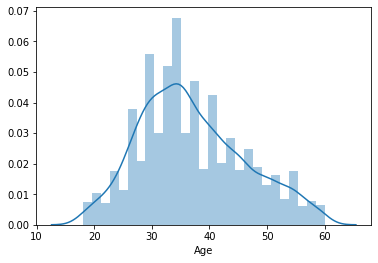

In [53]:

%matplotlib inline
sb.distplot(data.Age)

## As P value is < 5% , So we can reject H0 and accept Ha.

### Conculsion for Hypothesis 1 : Ha---> Average age of employees in the company  is not euqal to 20

# Hypothesis 2

In [54]:
from sklearn.preprocessing import LabelEncoder
enc= LabelEncoder()
gender = ['Gender']
for i in gender:
    data[[i]] = enc.fit_transform(data[[i]])
        
data.Gender

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0       0
1       0
2       1
3       1
4       1
       ..
4405    0
4406    1
4407    1
4408    1
4409    1
Name: Gender, Length: 4410, dtype: int64

In [55]:
print(stats.skew(data.Gender))
print(stats.kurtosis(data.Gender))

-0.40824829046386285
-1.8333333333333337


In [61]:
# For Hypothesis 2 , the hypothesized mean is 60
stats.ttest_1samp(data.Gender,60)

Ttest_1sampResult(statistic=-8051.019407503623, pvalue=0.0)

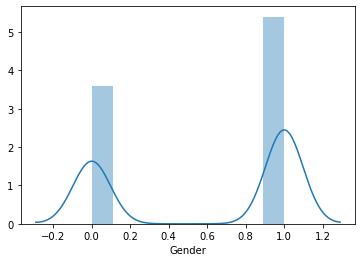

In [62]:
%matplotlib inline
sb.distplot(data.Gender)

# As P value is < 5% , So we can reject H0 and accept Ha.
## Conculsion for Hypothesis 2 : Ha---> Male employees strength in the company is not equal to 60%

# Hypothesis 3

H0 = Frequent Business travels(Category 1) were made by <=2% of employees in the company
Ha = Frequent Business travels(Category 1) were not made by 2% of employees in the company

In [80]:
print(stats.skew(data.BusinessTravel))
print(stats.kurtosis(data.BusinessTravel))

-1.4375371829186812
0.6962193971882282


In [98]:
stats.ttest_1samp(data.BusinessTravel,2)

Ttest_1sampResult(statistic=-39.179387347456256, pvalue=2.2937619073785918e-288)

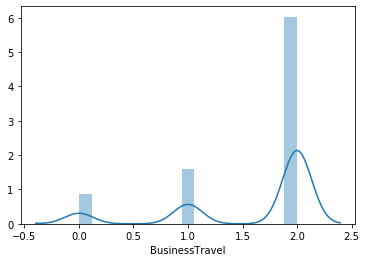

In [99]:
%matplotlib inline
sb.distplot(data.BusinessTravel)

In [92]:
data.BusinessTravel.value_counts()

2    3129
1     831
0     450
Name: BusinessTravel, dtype: int64

# As P value is > 5% , So we cannot reject H0(accept H0) and reject Ha.
## Conculsion for Hypothesis 3 : H0 -->Frequent Business travels(Category 1) were made by <=2% of employees in the company

# Hypothesis 4

In [100]:
print(stats.skew(data.BusinessTravel))
print(stats.kurtosis(data.BusinessTravel))

-1.4375371829186812
0.6962193971882282


In [111]:
stats.ttest_1samp(data.BusinessTravel,5)

Ttest_1sampResult(statistic=-338.62669792333514, pvalue=0.0)

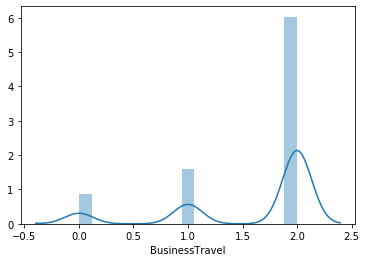

In [112]:

sb.distplot(data.BusinessTravel)

# As P value is < 5% , So we can reject H0 and acept Ha.
## Conculsion for Hypothesis 4 : Ha -->Travel rarely (category 0) were not made by 5% of employees in the company

# Hypotheis 5

In [113]:
print(stats.skew(data.JobRole))
print(stats.kurtosis(data.JobRole))

-0.35690525503832166
-1.1927606020209987


In [115]:
stats.ttest_1samp(data.JobRole,40)

Ttest_1sampResult(statistic=-958.9522990036978, pvalue=0.0)

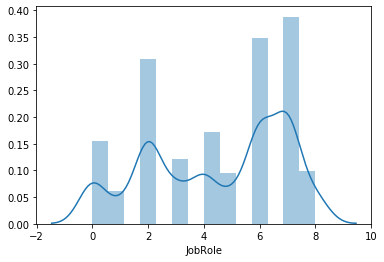

In [116]:
sb.distplot(data.JobRole)

# As P value is < 5% , So we can reject H0 and acept Ha.
## Conculsion for Hypothesis 5 : Ha -->Job role in the company is not same for 40% of employees in the company

# Hypotheis 6

In [121]:
print(stats.skew(data.Department))
print(stats.kurtosis(data.Department))

0.17205501555446082
-0.39418339663643653


In [134]:
stats.ttest_1samp(data.Department,1.27)

Ttest_1sampResult(statistic=-1.190014444536405, pvalue=0.23410478810369023)

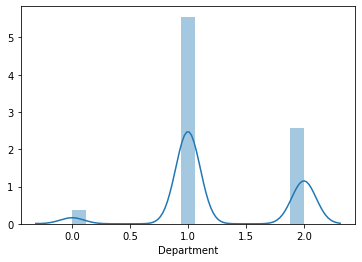

In [135]:
sb.distplot(data.Department)

# As P value is > 5% , So we cannot reject H0(Accept H0) and Reject Ha.
## Conculsion for Hypothesis 6 : H0 -->Average strength of a department in the company is 1.27

# Hypothesis 7

In [136]:
print(stats.skew(data.YearsWithCurrManager))
print(stats.kurtosis(data.YearsWithCurrManager))

0.832600290620938
0.16639794960130283


In [137]:
print(stats.skew(data.YearsSinceLastPromotion))
print(stats.kurtosis(data.YearsSinceLastPromotion))

1.982264623462895
3.596317950017548


In [139]:
stats.ttest_rel(data.YearsWithCurrManager, data.YearsSinceLastPromotion)

Ttest_relResult(statistic=38.10345356281864, pvalue=7.198952741945845e-275)

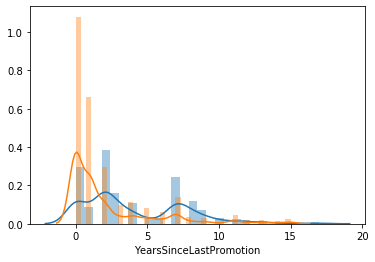

In [141]:
sb.distplot(data.YearsWithCurrManager)
sb.distplot(data.YearsSinceLastPromotion)

# As P value is > 5% , So we cannot reject H0(Accept H0) and Reject Ha.
## Conculsion for Hypothesis 7 : H0 -->Employees are with current manager since last promotion

# Hypothesis 8

In [143]:
print(stats.skew(data.Gender))
print(stats.kurtosis(data.Gender))

-0.40824829046386285
-1.8333333333333337


In [144]:
print(stats.skew(data.MaritalStatus))
print(stats.kurtosis(data.MaritalStatus))

-0.1520192965127131
-1.115327007710114


In [145]:
stats.ttest_rel(data.Gender, data.MaritalStatus)

Ttest_relResult(statistic=-37.40531148066353, pvalue=3.263465768247889e-266)

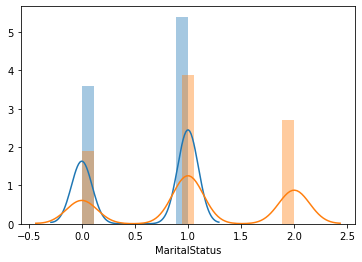

In [146]:
sb.distplot(data.Gender)
sb.distplot(data.MaritalStatus)

# As P value is < 5% , So we can reject H0 and accept Ha.
## Conculsion for Hypothesis 8 : Ha -->10% male employees of the company are not married

# Hypothesis 9

In [150]:
print(stats.skew(data.TrainingTimesLastYear))
print(stats.kurtosis(data.Age))

0.5525595985771927
-0.4068506603318873


In [151]:
stats.ttest_rel(data.TrainingTimesLastYear, data.Age)

Ttest_relResult(statistic=-244.75989484525627, pvalue=0.0)

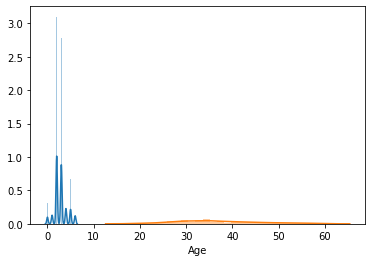

In [152]:
sb.distplot(data.TrainingTimesLastYear)
sb.distplot(data.Age)

# As P value is < 5% , So we can reject H0 and accept Ha.
### Conculsion for Hypothesis 9 : Ha -->Average training times is not from age group 30 or below.

# Hypthesis 10

In [157]:
print(stats.skew(data.PercentSalaryHike))
print(stats.kurtosis(data.Attrition))

0.8202898522796264
1.394745757491763


In [158]:
stats.ttest_rel(data.PercentSalaryHike, data.Attrition)

Ttest_relResult(statistic=272.62099503261675, pvalue=0.0)

# As P value is < 5% , So we can reject H0 and accept Ha.
## Conculsion for Hypothesis 10 : Ha -->Employees whose salary hike is less than or 15 didnot leave the company